In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [1]:
!pip install pmdarima


In [99]:
dfb0 = pd.read_csv('Data/Building Data/Building 0.csv')

In [4]:
df = dfb0.loc[(dfb0['Year'] == 2020) & (dfb0['Month'] == 10) & (dfb0['series_value'] < 500)]

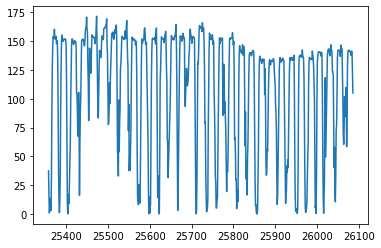

In [5]:
plt.plot(df['series_value'])

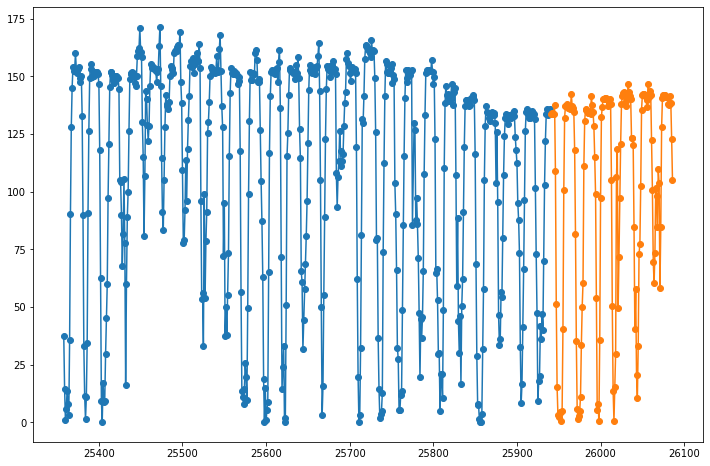

In [6]:
train_size = 0.8

ts = df['series_value']

split_idx = round(len(df['series_value'])* train_size)

# Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)

In [51]:
modelactual = auto_arima(train, start_p=0, start_q=0, seasonal=True)
modelactual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  582
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2463.510
Date:                Tue, 27 Sep 2022   AIC                           4939.020
Time:                        18:28:54   BIC                           4965.219
Sample:                             0   HQIC                          4949.233
                                - 582                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5713      1.476      4.452      0.000       3.679       9.464
ar.L1          1.9995      0.093     21.581      0.000       1.818       2.181
ar.L2         -1.2335      0.140     -8.786      0.000      -1.509      -0.958
ar.L3          0.1754      0.063      2.804      0.005       0.053       0.298
ma.L1         -0.7677      0.086     -8.927      0.000      -0.936      -0.599
sigma2       276.7199     13.442     20.587      0.000     250.375     303.065
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               133.61
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.42
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [196]:
data = train
# define model
my_order = (3, 1, 1)
my_seasonal_order = (3, 1, 1, 24)
model = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict(end=(len(test)-6))

C:\Users\sohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [197]:
yhat

25358      0.000000
25359     37.402113
25360     14.597646
25361      0.997063
25362      5.800244
            ...    
25494    167.890669
25495    166.888627
25496    169.989631
25497    163.516226
25498    154.842830
Name: predicted_mean, Length: 141, dtype: float64

In [199]:
lst = []
for i in range(25359, 25499):
    lst.append(yhat[i])

In [200]:
forecastdf = pd.DataFrame(lst, columns=['forecast']) 

In [201]:
test

25941    133.6
25942    134.3
25943    133.6
25944    133.9
25945    137.6
         ...  
26082    137.6
26083    141.4
26084    138.5
26085    123.0
26086    105.0
Name: series_value, Length: 146, dtype: float64

In [202]:
lst = []
for i in range(25947, 26087):
    lst.append(test[i])

In [203]:
testdfnew = pd.DataFrame(lst, columns=['test']) 

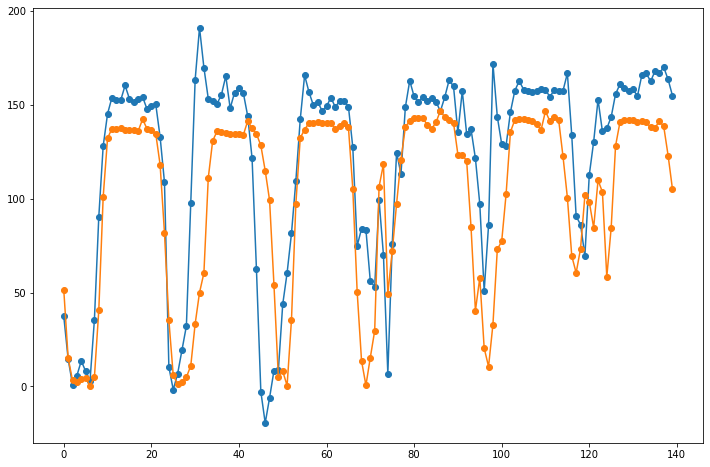

In [204]:
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(forecastdf['forecast'], label='Forecast', **kws)
plt.plot(testdfnew['test'], label='Test', **kws)

In [211]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))


pred = forecastdf['forecast'] 
tst = testdfnew['test']
trn = train

mean_absolute_scaled_error(pred,tst,trn)

2.2619267221488384